In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from datetime import datetime
import os

In [2]:
# Функция для создания директории с текущей датой

def create_date_directory():
    current_date = datetime.now().strftime('%Y-%m-%d')
    directory_name = current_date
    if not os.path.exists(directory_name):
        os.makedirs(directory_name)
    return directory_name

In [3]:
# Функция для сохранения данных в CSV

def save_data_to_csv(df, sensor_positions, directory_name):
    existing_files = [f for f in os.listdir(directory_name) if f.endswith('.csv')]
    next_file_number = len(existing_files) // 2 + 1
    
    # Имена файлов
    data_file_name = f"{directory_name}/data_{next_file_number}.csv"
    sensors_file_name = f"{directory_name}/sensors_{next_file_number}.csv"
    
    # Сохранение координат маяков в отдельный файл
    sensor_df = pd.DataFrame(sensor_positions, columns=['Sensor_X', 'Sensor_Y'])
    sensor_df.to_csv(sensors_file_name, index=False)
    
    # Сохранение данных измерений
    df.to_csv(data_file_name, index=False)
    
    return data_file_name, sensors_file_name


In [4]:
# Функция расчета RSSI

def calculate_rssi(sensor_pos, point_pos):
    rssi_0 = -40
    n = 3
    distance = np.linalg.norm(np.array(sensor_pos) - np.array(point_pos))
    
    return rssi_0 if distance == 0 else rssi_0 - 10 * n * np.log10(distance)

In [5]:
# Генерация данных

def generator(
        sensor_positions: list[tuple[int, int]],
        grid_points: list[tuple[float, float]]
) -> pd.DataFrame:
    data = []
    for point in grid_points:
        rssi_values = [calculate_rssi(sensor_pos, point) for sensor_pos in sensor_positions]
        avg_rssi = np.mean(rssi_values)
        data.append([point[0], point[1], *rssi_values, avg_rssi])

    columns = ['x', 'y'] + [f'RSSI_Sensor_{i+1}' for i in range(len(sensor_positions))] + ['Avg_RSSI']
    df = pd.DataFrame(data, columns=columns)

    return df

In [6]:
def visual(df: pd.DataFrame, sensor_positions: list[tuple[int, int]]):
    # Визуализация
    plt.figure(figsize=(8, 6))

    # Тепловая карта сигнала (RSSI)
    plt.scatter(df['x'], df['y'], c=df['Avg_RSSI'], cmap='plasma', s=50, label='Grid Points')
    # plt.colorbar(label='RSSI (dBm)')

    # Датчики
    for sensor in sensor_positions:
        plt.scatter(sensor[0], sensor[1], color='lime', edgecolor='black', s=200, marker='^', label='Sensor')

    # Настройки графика
    plt.title('Signal Visualization')
    plt.xlabel('X (m)')
    plt.ylabel('Y (m)')
    plt.grid(True, alpha=0.2)
    
    # Отображение
    plt.show()

In [7]:
# Генерация датчиков

def get_sensor_positions(n: int, num_sensors: int) -> list[tuple[int, int]]:
    possible_positions = []
    
    # Верхняя и нижняя стены
    for i in range(n):
        possible_positions.append((0, i))  # Верхняя стена
        possible_positions.append((n, i))  # Нижняя стена
    
    # Левая и правая стены (исключая углы, которые уже учтены)
    for i in range(1, n-1):
        possible_positions.append((i, 0))  # Левая стена
        possible_positions.append((i, n))  # Правая стена
    
    if num_sensors > len(possible_positions):
        raise ValueError(f"Запрошено {num_sensors} датчиков, но доступно только {len(possible_positions)} позиций на стенах")
    
    sensor_positions = random.sample(possible_positions, num_sensors)
    return sensor_positions


[(7, 5), (0, 6), (4, 0), (7, 2)]


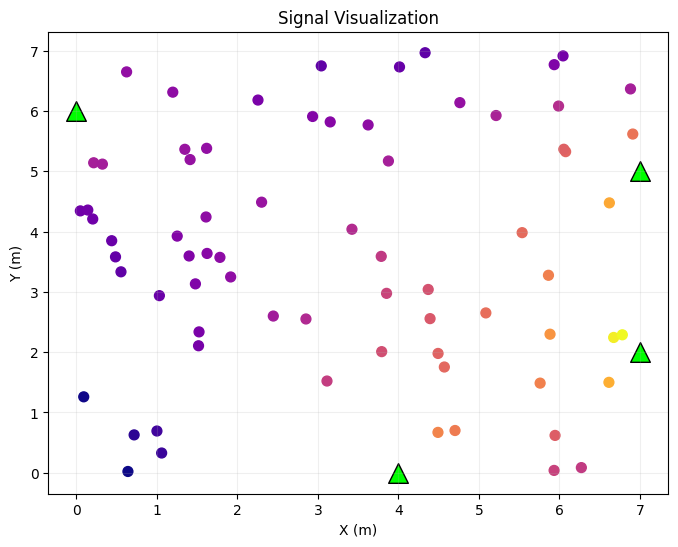

,x,y,RSSI_Sensor_1,RSSI_Sensor_2,RSSI_Sensor_3,RSSI_Sensor_4,Avg_RSSI
0,5.883046,2.298449,-53.976418,-65.260787,-54.188472,-41.890303,-53.828995
1,5.863575,3.275916,-49.447146,-64.317979,-57.286407,-46.979455,-54.507747
2,6.272057,0.084938,-60.887219,-68.067169,-50.701674,-49.344649,-57.250178
3,4.570404,1.753955,-58.238427,-63.852173,-47.975475,-51.632491,-55.424641
4,0.624255,6.650564,-64.558515,-38.650778,-66.179127,-66.915006,-59.075857
...,...,...,...,...,...,...,...
66,1.523848,2.336787,-63.537262,-57.955586,-55.962320,-62.178858,-59.908506
67,3.792123,2.008929,-59.262054,-62.223542,-49.158316,-55.186581,-56.457623
68,5.945486,0.619076,-59.613883,-67.123483,-49.299181,-47.197842,-55.808597
69,0.439042,3.849514,-64.706310,-50.242123,-61.589795,-65.007151,-60.386345


In [8]:
num_points = np.random.randint(10, 100)
room_size = np.random.randint(2, 10)
num_sensors = np.random.randint(4, 8)
sensor_positions = [(0, 0), (0, 4), (4, 4), (4, 0)]

# grid_points = [
#     (0.0, 3.0),
#     (0.0, 2.0),
#     (1.0, 0.0),
#     (2.0, 0.0),
#     (3.0, 0.0),
#     (4.0, 1.0),
#     (4.0, 2.0),
#     (1.0, 4.0),
#     (3.0, 3.5),
#     (3.0, 3.5),
#     (1.5, 3.0),
#     (2.0, 3.0),
#     (1.5, 2.0),
#     (3.0, 3.5),
#     (2.0, 1.0),
#     (2.5, 1.5),
# ]
#
# grid_size = 10
# grid_points = []

# x = np.linspace(0, room_size, grid_size)
# y = np.linspace(0, room_size, grid_size)
# xx, yy = np.meshgrid(x, y)
# grid_points = list(zip(xx.flatten(), yy.flatten()))


# Случайные генерации
sensor_positions = get_sensor_positions(room_size, num_sensors)
x = np.random.uniform(0, room_size, num_points)
y = np.random.uniform(0, room_size, num_points)
grid_points = list(zip(x, y))

print(sensor_positions)

df = generator(sensor_positions=sensor_positions, grid_points=grid_points)
visual(df=df, sensor_positions=sensor_positions)

directory_name = create_date_directory()
file_name = save_data_to_csv(df, sensor_positions, directory_name)

df

In [9]:
def calculate_rssi_with_noise(sensor_pos, point_pos):
    rssi_0 = -40
    n = 3
    noise_std_dev = 2  # Стандартное отклонение шума
    distance = np.linalg.norm(np.array(sensor_pos) - np.array(point_pos))
    noise = np.random.normal(0, noise_std_dev)

    return rssi_0 if distance == 0 else rssi_0 - 10 * n * np.log10(distance) + noise


In [10]:
def generator_with_noise(
        sensor_positions: list[tuple[int, int]],
        grid_points: list[tuple[float, float]]
) -> pd.DataFrame:
    data = []
    for point in grid_points:
        rssi_values = []
        for sensor_pos in sensor_positions:
            measurements = [calculate_rssi_with_noise(sensor_pos, point) for _ in range(10)]
            avg_measurement = np.mean(measurements)
            rssi_values.append(avg_measurement)
        avg_rssi = np.mean(rssi_values)
        data.append([point[0], point[1], *rssi_values, avg_rssi])

    columns = ['x', 'y'] + [f'RSSI_Sensor_{i+1}' for i in range(len(sensor_positions))] + ['Avg_RSSI']
    return pd.DataFrame(data, columns=columns)


[(0, 0), (0, 4), (4, 4), (4, 0)]


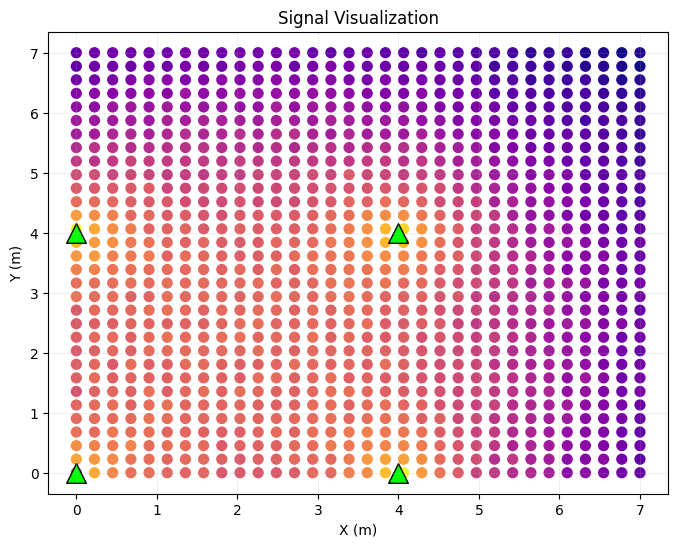

,x,y,RSSI_Sensor_1,RSSI_Sensor_2,RSSI_Sensor_3,RSSI_Sensor_4,Avg_RSSI
0,0.000000,0.0,-40.000000,-57.003230,-63.093831,-58.066099,-54.540790
1,0.225806,0.0,-20.641416,-58.269219,-62.057752,-57.281598,-49.562496
2,0.451613,0.0,-29.945032,-58.135806,-61.665750,-56.642661,-51.597312
3,0.677419,0.0,-36.139897,-57.872951,-62.297172,-55.808351,-53.029593
4,0.903226,0.0,-38.376105,-59.087580,-59.913503,-55.000225,-53.094353
...,...,...,...,...,...,...,...
1019,6.096774,7.0,-68.830882,-65.134715,-56.967123,-65.155453,-64.022043
1020,6.322581,7.0,-70.350379,-65.607364,-57.539358,-66.732305,-65.057351
1021,6.548387,7.0,-69.564992,-66.670705,-57.123763,-66.264748,-64.906052
1022,6.774194,7.0,-69.949286,-66.374354,-58.493961,-67.219316,-65.509229


In [11]:
sensor_positions = [(0, 0), (0, 4), (4, 4), (4, 0)]

grid_size = 32
grid_points = []

x = np.linspace(0, room_size, grid_size)
y = np.linspace(0, room_size, grid_size)
xx, yy = np.meshgrid(x, y)
grid_points = list(zip(xx.flatten(), yy.flatten()))


# Случайные генерации
# sensor_positions = get_sensor_positions(room_size, num_sensors)
# x = np.random.uniform(0, room_size, num_points)
# y = np.random.uniform(0, room_size, num_points)
# grid_points = list(zip(x, y))

print(sensor_positions)

df = generator_with_noise(sensor_positions=sensor_positions, grid_points=grid_points)
visual(df=df, sensor_positions=sensor_positions)

directory_name = create_date_directory()
file_name = save_data_to_csv(df, sensor_positions, directory_name)

df

In [12]:
print(file_name)

('2025-07-21/data_2.csv', '2025-07-21/sensors_2.csv')
